In [1]:

import torch
from dataset import EEGDataPreprocessor, EEGDataset
from util.functions import FreqDomain
import matplotlib.pyplot as plt
import numpy as np

c:\Users\jaipa\miniconda3\envs\research\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
processed_data = EEGDataPreprocessor()
train_dataset = EEGDataset(processed_data.x_train, processed_data.y_train)

Shape of X after trimming: (1692, 22, 500)
Shape of X after maxpooling: (1692, 22, 250)
Shape of X after averaging+noise and concatenating: (3384, 22, 250)
Shape of X after subsampling and concatenating: (6768, 22, 250)
Shape of X after trimming: (423, 22, 500)
Shape of X after maxpooling: (423, 22, 250)
Shape of X after averaging+noise and concatenating: (846, 22, 250)
Shape of X after subsampling and concatenating: (1692, 22, 250)
Shape of X after trimming: (443, 22, 500)
Shape of X after maxpooling: (443, 22, 250)
Shape of X after averaging+noise and concatenating: (886, 22, 250)
Shape of X after subsampling and concatenating: (1772, 22, 250)
Shape of testing set: (1772, 22, 250)
Shape of testing labels: (1772,)
Shape of training set: (6768, 22, 250)
Shape of validation set: (1692, 22, 250)
Shape of training labels: (6768,)
Shape of validation labels: (1692,)
Shape of training labels after categorical conversion: (6768, 4)
Shape of validation labels after categorical conversion: (16

In [3]:
data, label = train_dataset[200]
data, label = data[None, :, :, :], label[None, :]

In [33]:
label

tensor([[0., 1., 0., 0.]])

In [4]:
a = FreqDomain(8, 12, num_bins=250, sample_hz=62.5).forward(data).squeeze()

In [6]:
a.shape

torch.Size([22, 2, 17])

IndexError: index 22 is out of bounds for dimension 0 with size 22

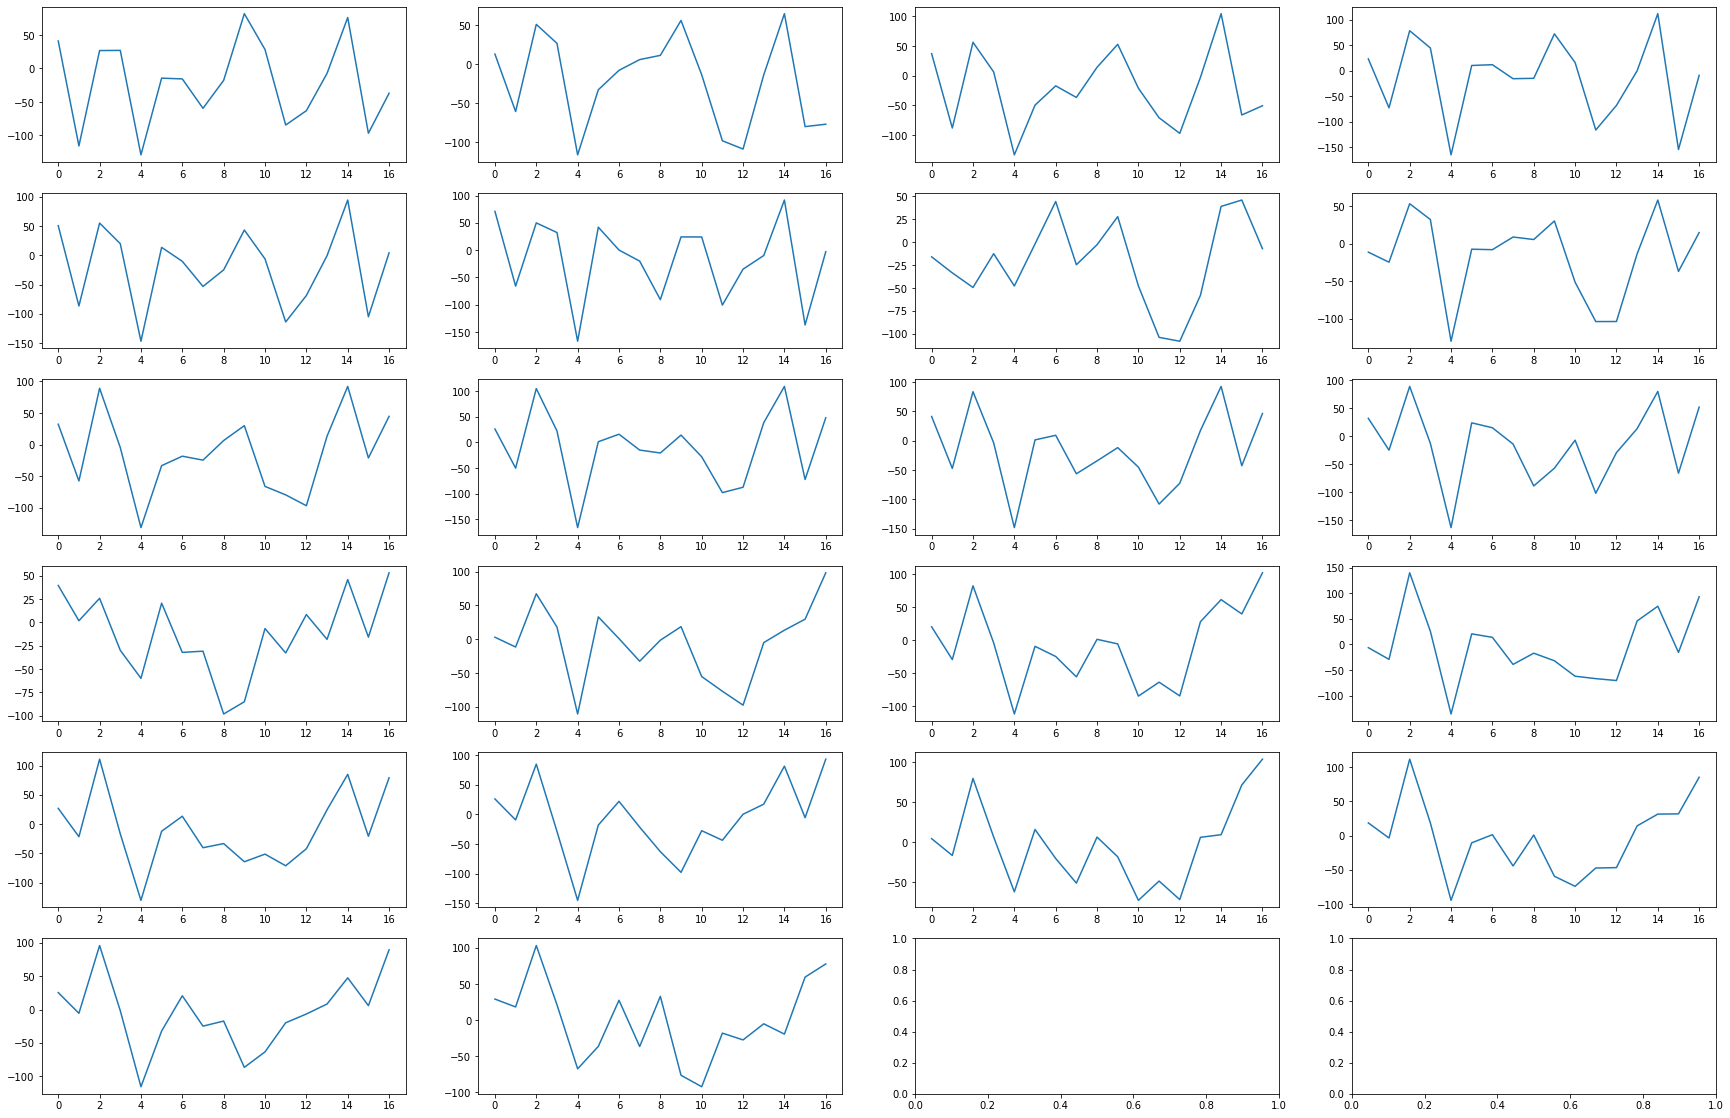

In [26]:
fig, ax = plt.subplots(6, 4, figsize=(30, 20))
for i in range(6):
    for j in range(4):
        ax[i,j].plot(np.arange(a.shape[-1]), a[i*4 + j,0,:])

IndexError: index 22 is out of bounds for dimension 0 with size 22

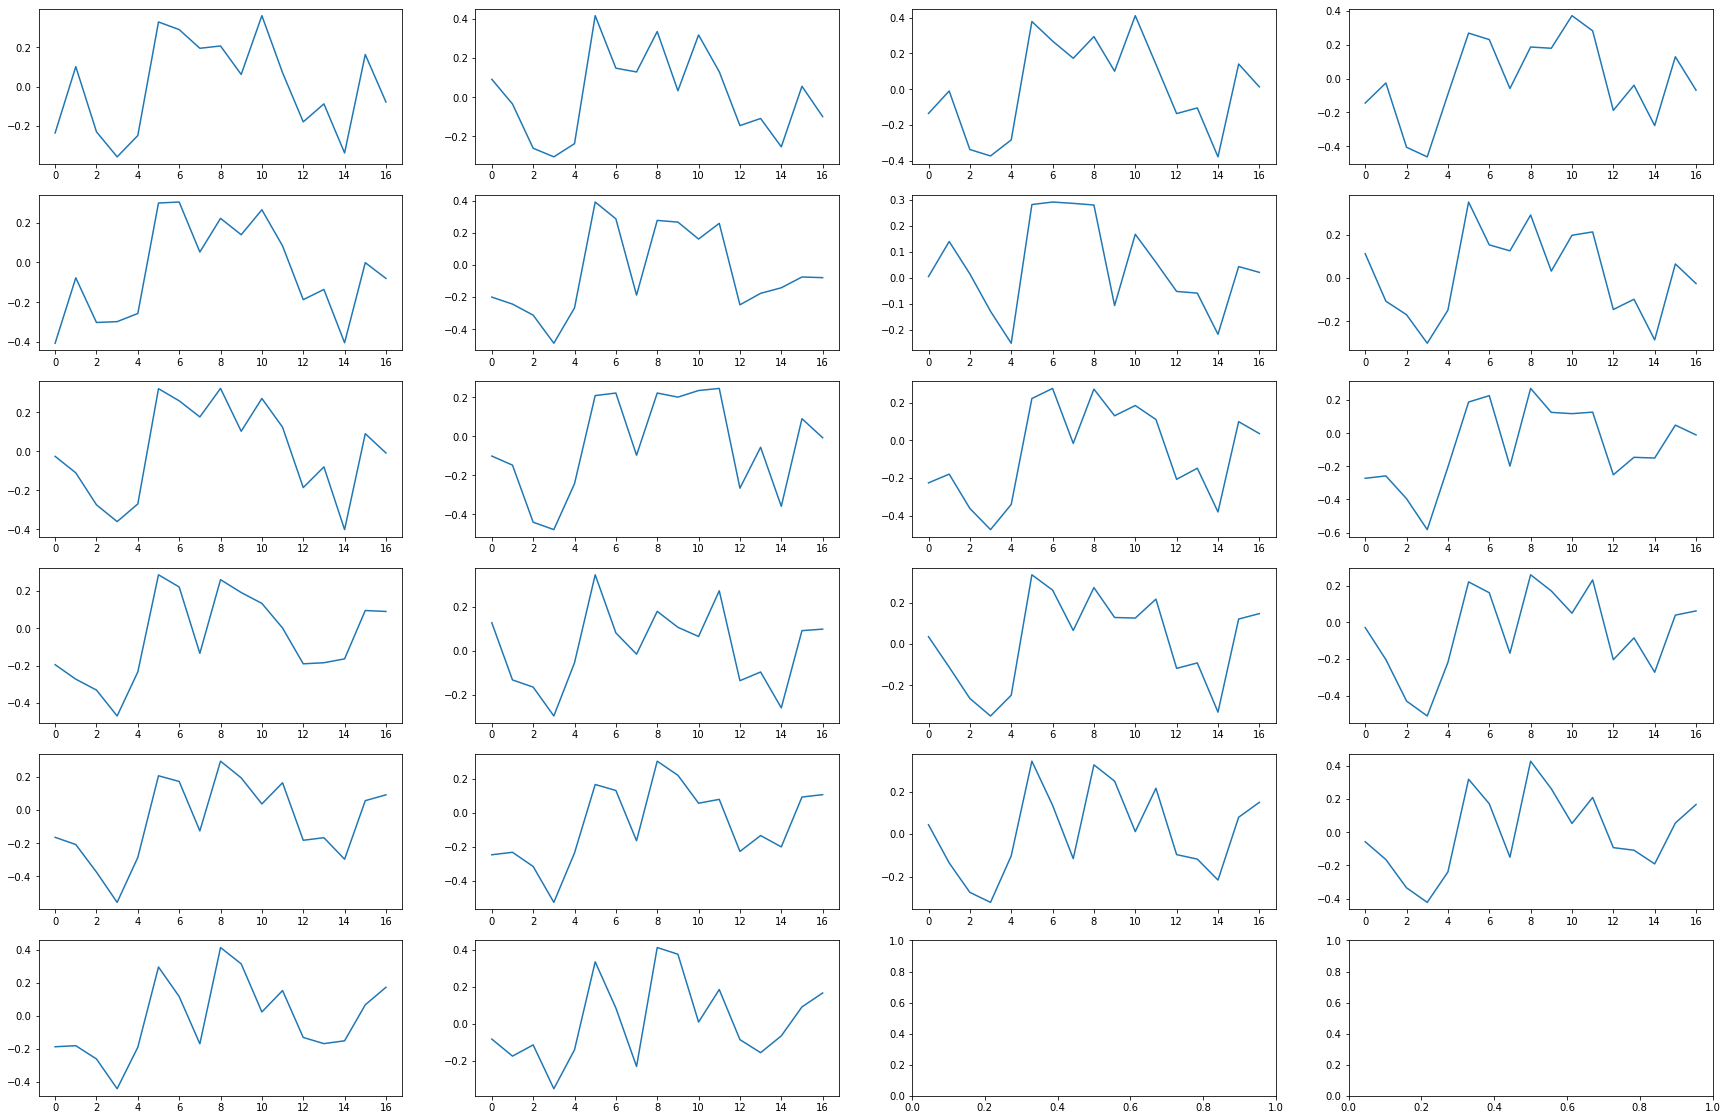

In [5]:
fig, ax = plt.subplots(6, 4, figsize=(30, 20))
for i in range(6):
    for j in range(4):
        ax[i,j].plot(np.arange(a.shape[-1]), a[i*4 + j,1,:])